In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Preparation of Data
In this part, we first read in the data. Then we calculate the means and standard errors.

In [2]:
#Read in data from the csv file
data012_table = np.loadtxt('dataset 012.csv', delimiter=',', skiprows=1)
data012 = {
    "time": data012_table[:,0],            #time
    "force": data012_table[:,1]-0.2,       #force (minus weight of hook)
    "displacement": data012_table[:,2],    #displacement
}
data011_table = np.loadtxt('dataset 011.csv', delimiter=',', skiprows=1)
data011 = {
    "time": data011_table[:,0],            #time
    "force": data011_table[:,1]-0.2,       #force (minus weight of hook)
    "displacement": data011_table[:,2],    #displacement
}
dataset2_table = np.loadtxt('dataset 023.csv', delimiter=',', skiprows=1)
dataset2 = {
    "time": dataset2_table[:,0],  #time
    "acc": dataset2_table[:,2],  #y acc
    "force": dataset2_table[:,4],  #force
}

def get_data_slice(data, start=0, stop=-1, step=None):
    val = {}
    for item in data.keys():
        val[item] = data[item][start:stop:step]
    return val
    

## Part 01

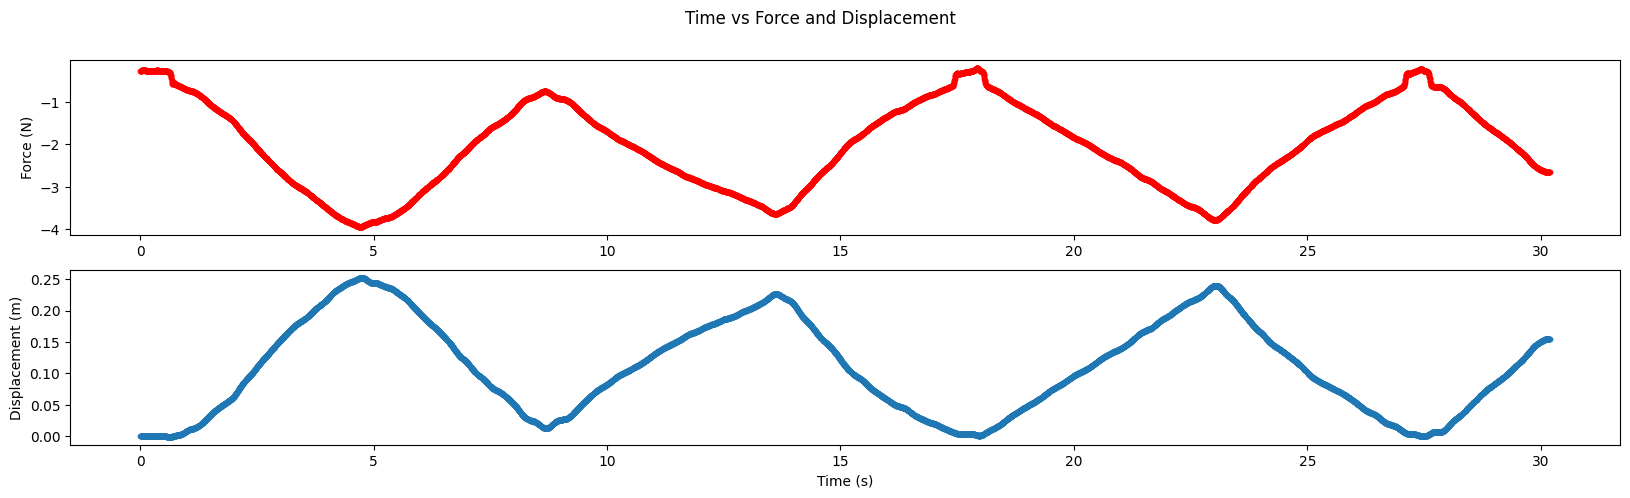

In [3]:
fig1, data01 = plt.subplots(2, figsize=(20,5))
fig1.suptitle("Time vs Force and Displacement")
data01[0].scatter(data012["time"], data012["force"], color="red", s=10)
data01[0].set(ylabel="Force (N)")
data01[1].scatter(data012["time"], data012["displacement"], s=10)
data01[1].set(xlabel="Time (s)", ylabel="Displacement (m)")
plt.show()

### Task: Find Spring Constant

1. select a spring de/extension
2. fit force and distance to find f=-kx
3. find uncertainty a_k
4. compare to accepted value (12 +- 10%)

[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'Displacement (m)')]

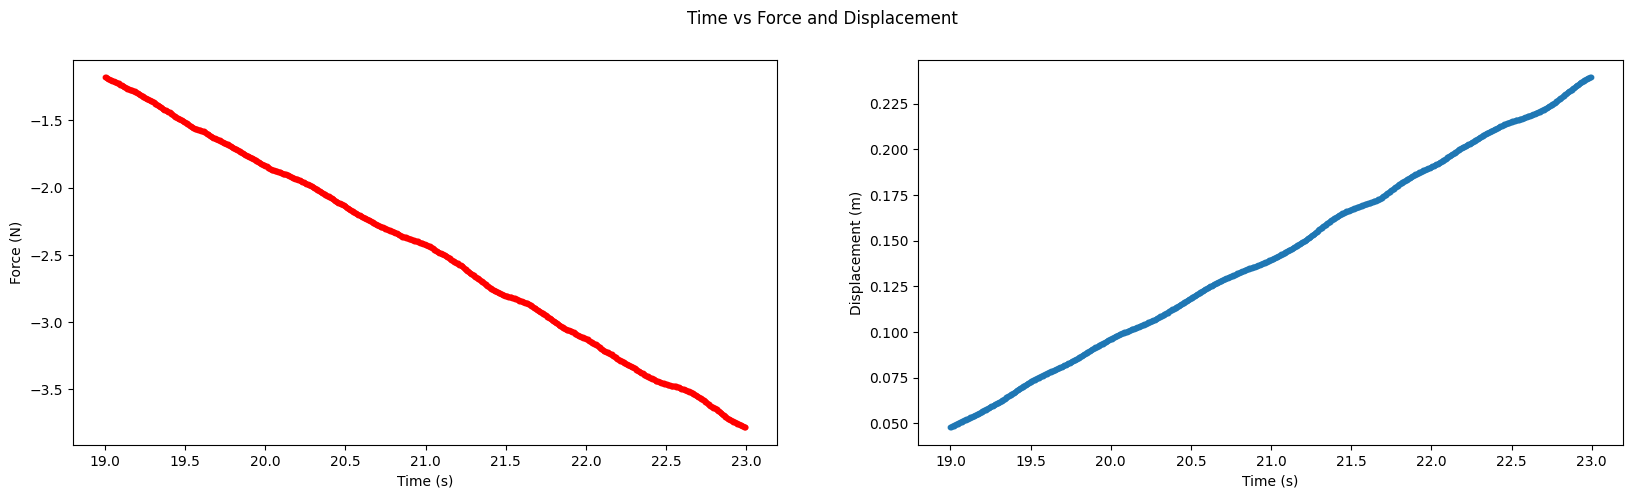

In [4]:
# get the data from 5-8 seconds, which is the first de-extension
extension_begin = list(data012["time"]).index(19)
extension_end = list(data012["time"]).index(23)
slice012 = get_data_slice(data012, extension_begin, extension_end)

#graph it
fig1, slice01 = plt.subplots(1, 2, figsize=(20,5))
fig1.suptitle("Time vs Force and Displacement")
slice01[0].scatter(slice012["time"], slice012["force"], color="red", s=10)
slice01[0].set(xlabel="Time (s)", ylabel="Force (N)")
slice01[1].scatter(slice012["time"], slice012["displacement"], s=10)
slice01[1].set(xlabel="Time (s)", ylabel="Displacement (m)")

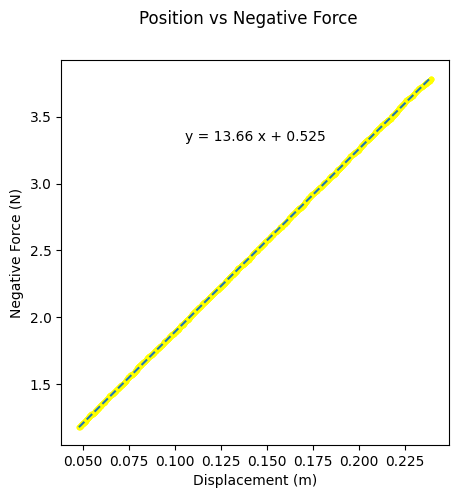

In [6]:
#graph it
fig01_spring, slice01_spring = plt.subplots(1, figsize=(5,5))
fig01_spring.suptitle("Position vs Negative Force")
fit = np.polyfit(slice012["displacement"], 0-slice012["force"], 1)
slice01_spring.scatter(slice012["displacement"],0-slice012["force"], color="yellow", s=10)
slice01_spring.plot(np.unique(slice012["displacement"]), np.poly1d(fit)(np.unique(slice012["displacement"])), linestyle='dashed')
slice01_spring.set(ylabel="Negative Force (N)", xlabel="Displacement (m)")
slice01_spring.text(0.5, 0.8,
             ("y =" + str(np.poly1d(fit))).replace("\n", ""),
             horizontalalignment='center', verticalalignment='center',
             transform=slice01_spring.transAxes)

computed_spring_constant_01 = fit[0]

## Part 02

In [ ]:
fig2, data2 = plt.subplots(2, figsize=(20,5))
fig2.suptitle("Time vs Y-acc and Force")
data2[0].scatter(dataset2["time"], dataset2["acc"], color="red", s=10)
data2[0].set(ylabel="Y Acc (m/s^2)")
data2[1].scatter(dataset2["force"], dataset2["z"], s=10)
data2[1].set(xlabel="Time (s)", ylabel="Force (N)")
plt.show()

In [ ]:
#IGNORE NOT DOING ANYTHING YET

#mean
#axis = 1 meaning we are average each row
mean = np.mean(time_table, axis=1)
print('mean :')
print(mean)

#standard deviation
std = np.std(time_table, axis=1, ddof=1)
print('standard deviation :')
print(std)

#standard error
stderr = std/np.sqrt(7)
print('standard error')
print(stderr)